<a href="https://colab.research.google.com/github/doumsdd/Oh-My-LEGO/blob/main/Legaux_Mams.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importons le fichier CSV pour avoir un aperçu des premières lignes et comprendre la structure des données
import pandas as pd

# Chargement des données
file_path = "/content/lego-sets.csv"
data = pd.read_csv(file_path)

# Affichage des 5 premières lignes
data.head()


,id,name,category,year,parts,img_link,set_link,raw_price,mean_price
0,21036-1,Arc de Triomphe,Architecture,2017.0,386.0,/sets/21036-1/12061.jpg/180x180p.jpg,/sets/21036-1/arc-de-triomphe/,"['\n$73.87\n', '\n$73.87\n']",73.87
1,21050-1,Architecture Studio,Architecture,2013.0,1211.0,/sets/21050-1/17335.jpg/180x180p.jpg,/sets/21050-1/architecture-studio/,[],0.00
2,21027-1,Berlin,Architecture > Skylines,2016.0,289.0,/sets/21027-1/32614.jpg/180x180p.jpg,/sets/21027-1/berlin/,"['\n$380.00\n', '\n$380.00\n']",380.00
3,21013-1,Big Ben,Architecture,2012.0,346.0,/sets/21013-1/13705.jpg/180x180p.jpg,/sets/21013-1/big-ben/,[],0.00
4,21029-1,Buckingham Palace,Architecture,2016.0,780.0,/sets/21029-1/7908.jpg/180x180p.jpg,/sets/21029-1/buckingham-palace/,"['\n$105.12\n', '\n$105.12\n']",105.12


In [2]:
# Calcul du nombre d'ensembles par catégorie
category_distribution = data['category'].value_counts()

# Affichage des 10 catégories les plus fréquentes
category_distribution.head(10)


Star Wars                   843
Friends                     499
Ninjago                     451
Technic                     349
City                        233
Creator > Creator 3-in-1    200
Creator                     168
City > Police               156
Brickheadz                  134
Harry Potter                133
Name: category, dtype: int64

In [3]:
# Identification du plus grand ensemble Lego pour chaque année en fonction du nombre de pièces
largest_sets_per_year = data.loc[data.groupby('year')['parts'].idxmax()]

# Affichage des résultats
largest_sets_per_year[['year', 'name', 'parts']]


,year,name,parts
4443,1965.0,Gears,43.0
4307,1977.0,Auto Chassis,608.0
4308,1978.0,Auto Chassis,603.0
4510,1979.0,Mobile Crane,512.0
5018,1980.0,Car Chassis,676.0
5071,1981.0,Tractor,612.0
4678,1982.0,Tow Truck,379.0
4380,1983.0,Dragster,250.0
4396,1984.0,Excavator,362.0
4658,1985.0,TECHNIC I: Simple Machines Set,210.0


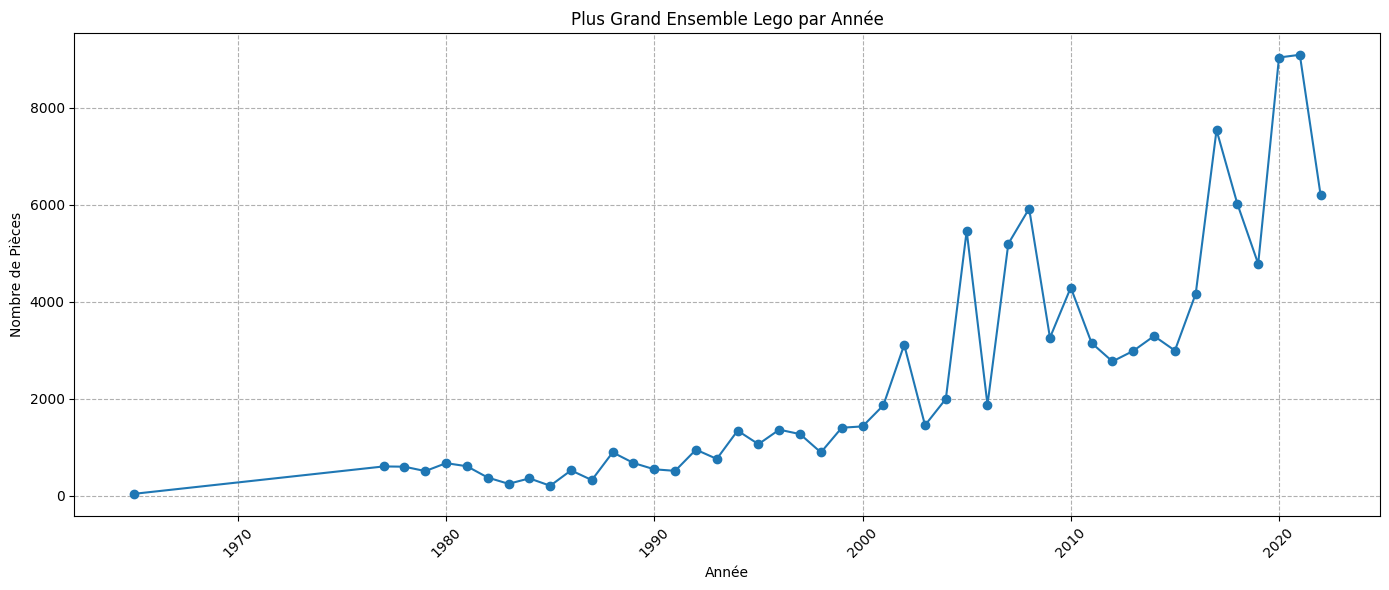

In [4]:
# Importation des bibliothèques de visualisation
import matplotlib.pyplot as plt

# Création du graphique
plt.figure(figsize=[14,6])
plt.plot(largest_sets_per_year['year'], largest_sets_per_year['parts'], marker='o')
plt.title('Plus Grand Ensemble Lego par Année')
plt.xlabel('Année')
plt.ylabel('Nombre de Pièces')
plt.grid(True, linestyle='--')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [10]:
# Importation des bibliothèques Bokeh
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import HoverTool

# Configuration de l'affichage dans le notebook
output_notebook()

# Création du graphique avec les noms des sets dans l'outil de survol
p_with_names = figure(width=800, height=400, title="Plus Grand Ensemble Lego par Année (interactif)", x_axis_label='Année', y_axis_label='Nombre de Pièces')
p_with_names.line(largest_sets_per_year['year'], largest_sets_per_year['parts'], line_width=2)
p_with_names.circle(largest_sets_per_year['year'], largest_sets_per_year['parts'], fill_color="white", size=8)

# Ajout d'un outil de survol avec les noms des sets
hover_with_names = HoverTool()
hover_with_names.tooltips = [("Année", "@x"), ("Nombre de Pièces", "@y"), ("Set", "@name")]
p_with_names.add_tools(hover_with_names)

# Ajout des noms des sets comme source de données
from bokeh.models import ColumnDataSource
source = ColumnDataSource(data=dict(x=largest_sets_per_year['year'], y=largest_sets_per_year['parts'], name=largest_sets_per_year['name']))
p_with_names.circle('x', 'y', size=8, source=source)

# Affichage du graphique
show(p_with_names)



In [8]:
# Sélection des 10 plus grands ensembles en termes de nombre de pièces
top_10_sets = data.nlargest(10, 'parts')
# Ajout de l'identifiant de l'ensemble au nom pour garantir l'unicité
top_10_sets['unique_name'] = top_10_sets['name'] + " (" + top_10_sets['id'] + ")"

# Création du graphique Bokeh avec les noms uniques
p_top_10_unique = figure(width=800, height=400, title="10 Plus Grands Ensembles Lego", x_axis_label='Ensemble', y_axis_label='Nombre de Pièces', x_range=top_10_sets['unique_name'])
p_top_10_unique.vbar(x=top_10_sets['unique_name'], top=top_10_sets['parts'], width=0.5)

# Ajout d'un outil de survol
hover_top_10_unique = HoverTool()
hover_top_10_unique.tooltips = [("Ensemble", "@x"), ("Nombre de Pièces", "@top")]
p_top_10_unique.add_tools(hover_top_10_unique)

# Personnalisation des étiquettes de l'axe des abscisses
p_top_10_unique.xaxis.major_label_orientation = "vertical"

# Affichage du graphique
show(p_top_10_unique)


In [9]:
# Importation de la bibliothèque Plotly
import plotly.express as px

# Sélection des 5 plus grandes catégories
top_5_categories = category_distribution.head(5)

# Création du diagramme circulaire avec Plotly
fig = px.pie(values=top_5_categories, names=top_5_categories.index, title='Distribution des 5 Plus Grandes Catégories d\'Ensembles Lego')

# Affichage du graphique
fig.show()


In [12]:
# Filtrage des données pour les catégories Star Wars, Friends et Ninjago
filtered_data = data[data['category'].isin(['Star Wars', 'Friends', 'Ninjago'])]

# Groupement des données par année et catégorie, puis somme des pièces
grouped_data = filtered_data.groupby(['year', 'category'])['parts'].sum().reset_index()

# Création d'un graphique à barres avec Plotly
fig = px.bar(grouped_data, x='year', y='parts', color='category', title="Évolution des Ensembles Star Wars, Friends et Ninjago", labels={'parts': 'Nombre de Pièces', 'year': 'Année'})

# Affichage du graphique
fig.show()


In [13]:
# Filtrage des données pour la catégorie "Architecture"
architecture_sets = data[data['category'] == 'Architecture']

# Sélection des 10 plus grands ensembles en termes de nombre de pièces
top_10_architecture_sets = architecture_sets.nlargest(10, 'parts')

# Affichage des résultats
print(top_10_architecture_sets[['name', 'parts']])

                     name   parts
29            Robie House  2276.0
44              Taj Mahal  2024.0
11  Empire State Building  1767.0
40      Statue of Liberty  1685.0
46        The White House  1483.0
15  Great Pyramid of Giza  1476.0
21            LEGO Campus  1461.0
1     Architecture Studio  1211.0
48       Trafalgar Square  1197.0
16         Imperial Hotel  1188.0


In [16]:
from bokeh.plotting import figure, show
from bokeh.transform import cumsum
from bokeh.io import output_notebook
from math import pi

# Filtrage des données pour la catégorie "Architecture"
architecture_sets = data[data['category'] == 'Architecture']

# Sélection des 10 plus grands ensembles en termes de nombre de pièces
top_10_architecture_sets = architecture_sets.nlargest(10, 'parts')

# Préparation des données pour le pie chart
top_10_architecture_sets['angle'] = top_10_architecture_sets['parts']/top_10_architecture_sets['parts'].sum() * 2*pi
top_10_architecture_sets['color'] = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Création du pie chart avec Bokeh
p_pie = figure(height=600, width=600, title="Top 10 des Ensembles Architecture", toolbar_location=None, tools="", tooltips="@name: @parts", x_range=(-0.5, 1.0), y_range=(-0.5, 1.0))
p_pie.wedge(x=0, y=0, radius=0.4, start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'), line_color="white", fill_color='color', legend_field='name', source=top_10_architecture_sets)

# Paramètres de style
p_pie.axis.axis_label = None
p_pie.axis.visible = False
p_pie.grid.grid_line_color = None
p_pie.legend.label_text_font_size = '10pt'

# Affichage du graphique
show(p_pie)

In [17]:
# Groupement des données par année et catégorie, puis somme des pièces
grouped_data_by_year_category = data.groupby(['year', 'category'])['parts'].sum().reset_index()

# Identification de la meilleure catégorie pour chaque année en fonction du nombre de pièces
best_category_per_year = grouped_data_by_year_category.loc[grouped_data_by_year_category.groupby('year')['parts'].idxmax()]

# Affichage des résultats
best_category_per_year[['year', 'category', 'parts']]


,year,category,parts
0,1965.0,Technic,46.0
1,1977.0,Technic > Expert Builder,1652.0
2,1978.0,Technic > Expert Builder,2401.0
3,1979.0,Technic > Expert Builder,2170.0
4,1980.0,Technic > Expert Builder,1569.0
6,1981.0,Technic > Expert Builder,1500.0
8,1982.0,Technic > Universal Building Set,557.0
9,1983.0,Technic,283.0
11,1984.0,Technic,637.0
13,1985.0,Technic,428.0


In [18]:
from bokeh.plotting import figure, show
from bokeh.models import HoverTool, ColumnDataSource
from bokeh.io import output_notebook

# Groupement des données par année et catégorie, puis somme des pièces
grouped_data_by_year_category = data.groupby(['year', 'category'])['parts'].sum().reset_index()

# Identification de la meilleure catégorie pour chaque année en fonction du nombre de pièces
best_category_per_year = grouped_data_by_year_category.loc[grouped_data_by_year_category.groupby('year')['parts'].idxmax()]

# Création d'une source de données pour Bokeh
source = ColumnDataSource(data=dict(
    x=best_category_per_year['year'],
    y=best_category_per_year['parts'],
    category=best_category_per_year['category']
))

# Création du graphique avec Bokeh
p_interactive = figure(width=800, height=400, title="Meilleure Catégorie Lego par Année", x_axis_label='Année', y_axis_label='Nombre de Pièces')
p_interactive.line('x', 'y', line_width=2, source=source)
p_interactive.circle('x', 'y', fill_color="white", size=8, source=source)

# Ajout d'un outil de survol avec les détails de la catégorie
hover_interactive = HoverTool()
hover_interactive.tooltips = [("Année", "@x"), ("Nombre de Pièces", "@y"), ("Catégorie", "@category")]
p_interactive.add_tools(hover_interactive)

# Affichage du graphique
show(p_interactive)


In [20]:
# Filtrage des données pour la catégorie "Icons"
icons_sets = data[data['category'] == 'Icons']

# Sélection des 10 ensembles de la catégorie "Icons" ayant le plus grand nombre de pièces
top_10_icons_sets_by_parts = icons_sets.nlargest(10, 'parts')[['name', 'parts']]

# Renommage des colonnes pour une meilleure lisibilité
top_10_icons_sets_by_parts.columns = ['Ensemble', 'Nombre de Pièces']

# Affichage des résultats
top_10_icons_sets_by_parts


,Ensemble,Nombre de Pièces
2102,Titanic,9092.0
2084,Colosseum,9036.0
2100,Real Madrid – Santiago Bernabéu Stadium,5876.0
2082,Camp Nou - FC Barcelona,5509.0
2092,Lion Knight's Castle,4515.0
2093,Loop Coaster,3756.0
2090,Haunted House,3232.0
2079,Atari 2600,2532.0
2094,NASA Space Shuttle Discovery,2355.0
4899,ECTO-1,2352.0


In [21]:
from bokeh.plotting import figure, show
from bokeh.models import HoverTool
from bokeh.io import output_notebook

# Création d'un graphique à barres avec Bokeh
p_icons = figure(width=800, height=400, title="Top 10 des Ensembles Icons par Nombre de Pièces", x_axis_label='Ensemble', y_axis_label='Nombre de Pièces', x_range=top_10_icons_sets_by_parts['Ensemble'])
p_icons.vbar(x=top_10_icons_sets_by_parts['Ensemble'], top=top_10_icons_sets_by_parts['Nombre de Pièces'], width=0.5)

# Ajout d'un outil de survol avec les noms des ensembles
hover_icons = HoverTool()
hover_icons.tooltips = [("Ensemble", "@x"), ("Nombre de Pièces", "@top")]
p_icons.add_tools(hover_icons)

# Personnalisation des étiquettes de l'axe des abscisses
p_icons.xaxis.major_label_orientation = "vertical"

# Affichage du graphique
show(p_icons)


In [22]:
# Filtrage des données pour la catégorie "Icons" et sélection des 10 ensembles ayant le plus grand nombre de pièces
icons_sets = data[data['category'] == 'Icons']
top_10_icons_sets_by_parts = icons_sets.nlargest(10, 'parts')[['name', 'parts']]

# Création d'un graphique à barres avec Plotly
fig = px.bar(top_10_icons_sets_by_parts, x='name', y='parts', title="Top 10 des Ensembles Icons par Nombre de Pièces", labels={'name': 'Ensemble', 'parts': 'Nombre de Pièces'})

# Affichage du graphique
fig.show()